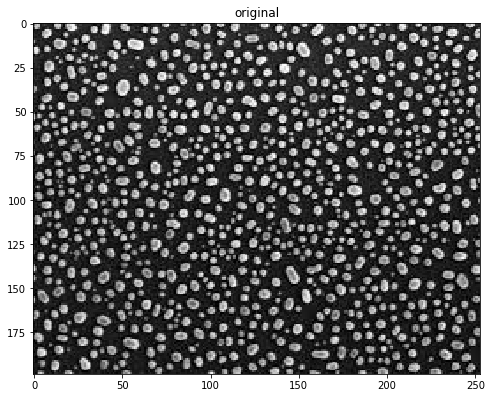

In [23]:
import Dataset
from Utils import visualize

original = Dataset.small()
visualize(original, 'original')

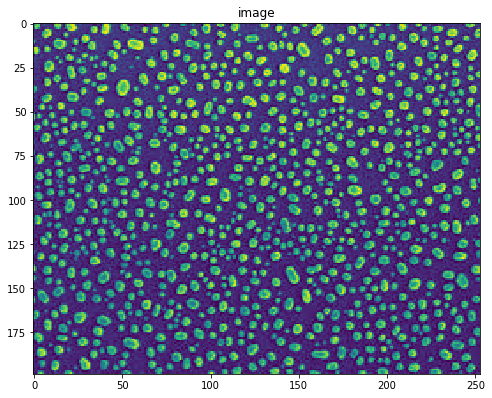

In [24]:
from Utils import image_to_grayscale
from skimage import transform
import numpy as np


image = image_to_grayscale(original)
# image = transform.resize(image, (np.array(image.shape) / np.max(image.shape) * 250).astype(int))

visualize(image, 'image')


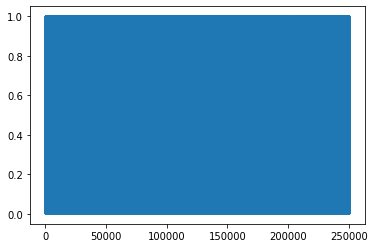

In [25]:
from sklearn.feature_extraction import img_to_graph
import matplotlib.pyplot as plot

graph = img_to_graph(image / 255)
graph.data = np.exp(- 5 * graph.data / graph.data.std())

plot.plot([i for i in range(len(graph.data))], graph.data)
# visualize(graph, 'graph')

In [26]:
from sklearn.cluster import spectral_clustering


labels_big = spectral_clustering(
    graph, 
    n_clusters=5, 
    n_init=1,
    eigen_solver='amg',
    assign_labels='discretize', 
    random_state=1,
)
labels_big = labels_big.reshape(image.shape)


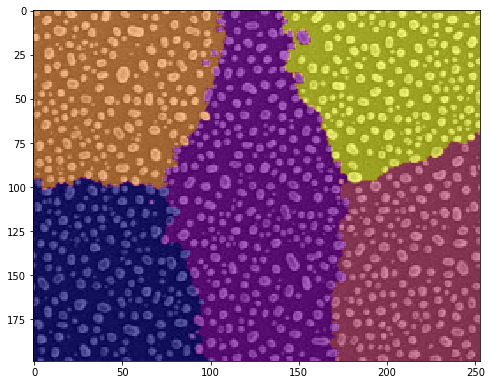

In [27]:
plot.figure(figsize=(8, 8))
plot.imshow(image, cmap='gray')
plot.imshow(labels_big, cmap='plasma', alpha=.6, interpolation='bilinear')
plot.show()


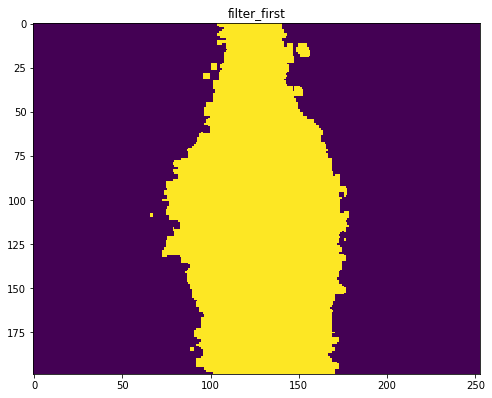

In [28]:
filter_first = labels_big == 1

visualize(filter_first, 'filter_first')

In [29]:
image[filter_first is False] = 0

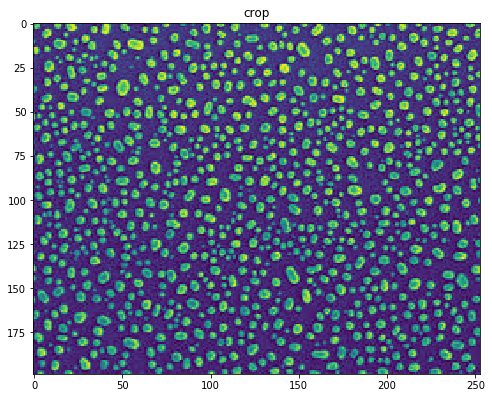

In [30]:
crop = image[~(image==0).all(1)]
crop = crop.T
crop = crop[~(crop==0).all(1)]
crop = crop.T

visualize(crop, 'crop')

In [31]:
graph = img_to_graph(crop / 255)
graph.data = np.exp(- 5 * graph.data / graph.data.std())


In [32]:
from sklearn.cluster import spectral_clustering


labels = spectral_clustering(
    graph, 
    n_clusters=5, 
    n_init=2,
    eigen_solver='amg',
    assign_labels='discretize', 
    random_state=1,
)
labels = labels.reshape(crop.shape)
labels[crop == 0] = 0

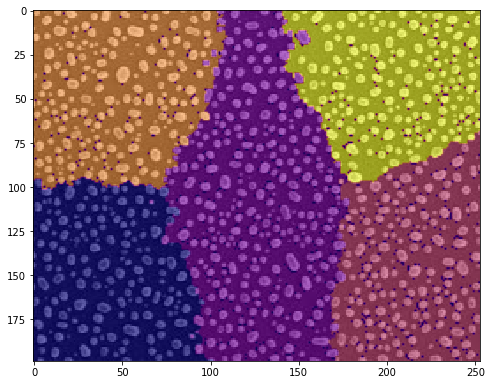

In [33]:
plot.figure(figsize=(8, 8))
plot.imshow(crop, cmap='gray')
plot.imshow(labels, cmap='plasma', alpha=.6, interpolation='bilinear')
plot.show()
